In [4]:
import requests
from bs4 import BeautifulSoup as BS

In [133]:
url="https://www.the-numbers.com/market/genre/Adventure"

In [134]:
#function to to connect to URL of scraping target

def get_page(url):
    try:
        page = requests.get(url, timeout=5)
    # include code to do status check
        if page.status_code != 200:
            print(page.status_code)
    except requests.ConnectionError as e:
        print("OOPS!! Connection Error. Make sure you are connected to Internet. Technical Details given below.\n")
        print(str(e))
    except requests.Timeout as e:
        print("OOPS!! Timeout Error")
        print(str(e))
    except requests.RequestException as e:
        print("OOPS!! General Error")
        print(str(e))
    except KeyboardInterrupt:
        print("Someone closed the program") 
        
        
    return page

In [135]:
#ping designated URL
page = get_page(url)
page

<Response [200]>

In [136]:
#Scrape all data
soup = BS(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
  </script>
  <meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
  <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- for apple mobile -->
  <meta content="521546213" property="fb:admins">
   <meta content="initial-scale=1" name="viewport"/>
   <meta content="Box Offi

In [137]:
#scrape, target to table in middle of page, amidst 3 other tables on page.
#[1] is to target second occurrence of <table> on page, then narrow down with 'td' 'class''data'
tables = soup.find_all('table')[1].findAll('td', {'class':'data'})
#[0].text  Test of .text function for result

In [41]:
print(tables)

[<td class="data"><a href="/market/1995/summary">1995</a></td>, <td class="data"><a href="/market/1995/genre/Adventure">29</a></td>, <td class="data"><a href="/market/1995/genres"><b>14.52%</b></a></td>, <td class="data">$771,507,571</td>, <td class="data">177,358,047</td>, <td class="data">$1,615,731,808</td>, <td class="data">$150,148,222</td>, <td class="data"><a href="/market/1996/summary">1996</a></td>, <td class="data"><a href="/market/1996/genre/Adventure">34</a></td>, <td class="data"><a href="/market/1996/genres"><b>22.29%</b></a></td>, <td class="data">$1,290,490,033</td>, <td class="data">291,966,054</td>, <td class="data">$2,659,810,752</td>, <td class="data">$306,169,255</td>, <td class="data"><a href="/market/1997/summary">1997</a></td>, <td class="data"><a href="/market/1997/genre/Adventure">23</a></td>, <td class="data"><a href="/market/1997/genres"><b>13.87%</b></a></td>, <td class="data">$881,902,843</td>, <td class="data">192,135,684</td>, <td class="data">$1,750,356

In [138]:
#clean scraped data with .text function, append to list.
Adventure = []
for item in tables:
    Adventure.append([item][0].text)
    

In [139]:
Adventure

['1995',
 '29',
 '14.52%',
 '$771,507,571',
 '177,358,047',
 '$1,615,731,808',
 '$150,148,222',
 '1996',
 '34',
 '22.29%',
 '$1,290,490,033',
 '291,966,054',
 '$2,659,810,752',
 '$306,169,255',
 '1997',
 '23',
 '13.87%',
 '$881,902,843',
 '192,135,684',
 '$1,750,356,081',
 '$250,650,052',
 '1998',
 '29',
 '23.84%',
 '$1,614,467,732',
 '344,236,174',
 '$3,135,991,545',
 '$201,578,182',
 '1999',
 '27',
 '21.97%',
 '$1,612,432,107',
 '317,407,880',
 '$2,891,585,787',
 '$430,443,350',
 '2000',
 '30',
 '17.62%',
 '$1,327,311,892',
 '246,254,507',
 '$2,243,378,559',
 '$253,367,455',
 '2001',
 '32',
 '27.15%',
 '$2,268,870,844',
 '400,860,557',
 '$3,651,839,674',
 '$300,404,434',
 '2002',
 '45',
 '30.79%',
 '$2,818,919,526',
 '485,184,060',
 '$4,420,026,787',
 '$403,706,375',
 '2003',
 '46',
 '26.37%',
 '$2,424,131,447',
 '402,011,823',
 '$3,662,327,708',
 '$339,714,367',
 '2004',
 '47',
 '31.09%',
 '$2,887,833,719',
 '465,029,564',
 '$4,236,419,328',
 '$441,226,247',
 '2005',
 '43',
 '28.87%

In [140]:
#function to to create list of dictionaries with preset keys using list for values

def get_dict(lst):
    new_dict = {}  #each dictionary
    genre_list = [] #list to hold dictionaries
    for x in (range(0,int(len(lst)),7)): #x carrier into a slice of 6 items together through the cleaned + scraped data
        new_dict = {'Year': lst[x],
                    'Films Released': lst[x+1], #+1 to adjust position of x carrier
                    'Market Share': lst[x+2],
                    'Gross': lst[x+3],
                    'Tickets Sold': lst[x+4],
                    'Inflation Adjusted Gross': lst[x+5]}
        
        genre_list.append(new_dict) #append dictionary to list.
    return genre_list

In [141]:
adventure_list = get_dict(Adventure) #create list of dictionaries

In [142]:
len(adventure_list) #check length of correctness

25

In [143]:
adventure_list #check data for correctness

[{'Year': '1995',
  'Films Released': '29',
  'Market Share': '14.52%',
  'Gross': '$771,507,571',
  'Tickets Sold': '177,358,047',
  'Inflation Adjusted Gross': '$1,615,731,808'},
 {'Year': '1996',
  'Films Released': '34',
  'Market Share': '22.29%',
  'Gross': '$1,290,490,033',
  'Tickets Sold': '291,966,054',
  'Inflation Adjusted Gross': '$2,659,810,752'},
 {'Year': '1997',
  'Films Released': '23',
  'Market Share': '13.87%',
  'Gross': '$881,902,843',
  'Tickets Sold': '192,135,684',
  'Inflation Adjusted Gross': '$1,750,356,081'},
 {'Year': '1998',
  'Films Released': '29',
  'Market Share': '23.84%',
  'Gross': '$1,614,467,732',
  'Tickets Sold': '344,236,174',
  'Inflation Adjusted Gross': '$3,135,991,545'},
 {'Year': '1999',
  'Films Released': '27',
  'Market Share': '21.97%',
  'Gross': '$1,612,432,107',
  'Tickets Sold': '317,407,880',
  'Inflation Adjusted Gross': '$2,891,585,787'},
 {'Year': '2000',
  'Films Released': '30',
  'Market Share': '17.62%',
  'Gross': '$1,32

In [6]:
#
#
#
#
# START HERE
#
#
#
#
#

In [26]:
import requests
from bs4 import BeautifulSoup as BS

In [27]:
genre_list = ["https://www.the-numbers.com/market/genre/Adventure",
              "https://www.the-numbers.com/market/genre/Action",
             "https://www.the-numbers.com/market/genre/Drama",
             "https://www.the-numbers.com/market/genre/Comedy",
             "https://www.the-numbers.com/market/genre/Thriller-or-Suspense",
             "https://www.the-numbers.com/market/genre/Horror",
             "https://www.the-numbers.com/market/genre/Romantic-Comedy",
             "https://www.the-numbers.com/market/genre/Musical",
             "https://www.the-numbers.com/market/genre/Documentary",
             "https://www.the-numbers.com/market/genre/Black-Comedy",
             "https://www.the-numbers.com/market/genre/Western",
             "https://www.the-numbers.com/market/genre/Concert-or-Performance",
             "https://www.the-numbers.com/market/genre/Multiple-Genres",
             "https://www.the-numbers.com/market/genre/Reality"]
    

In [1]:
# genre_type = ['Adventure',
#               'Action',
#               'Drama',
#               'Comedy',
#               'Thriller_Suspense',
#               'Horror',
#               'Romantic_Comedy',
#               'Musical',
#               'Documentary',
#               'Black_Comedy',
#               'Western',
#               'Concert_or_Performance',
#               'Multiple_Genres',
#               'Reality']

In [28]:
def all_genres(list_o_things):
    movies_list = []
    for x in list_o_things:
#connect
        try:
            page = requests.get(x, timeout=5)
        # include code to do status check
            if page.status_code != 200:
                print(page.status_code)
        except requests.ConnectionError as e:
            print("OOPS!! Connection Error. Make sure you are connected to Internet. Technical Details given below.\n")
            print(str(e))
        except requests.Timeout as e:
            print("OOPS!! Timeout Error")
            print(str(e))
        except requests.RequestException as e:
            print("OOPS!! General Error")
            print(str(e))
        except KeyboardInterrupt:
            print("Someone closed the program") 
#parser
        soup = BS(page.content, 'html.parser')
        tables = soup.find_all('table')[1].findAll('td', {'class':'data'})
#scrape into holding pattern
        holding_pattern = []
        
        for item in tables:
            holding_pattern.append([item][0].text)
#         print(holding_pattern)  this worked, data is collected
#from list to listed dictionaries
        new_dict = {}  #each dictionary
        genre_list = [] #list to hold dictionaries
#x carrier into a slice of 6 items together through the cleaned + scraped data
    
        for y in (range(0,int(len(holding_pattern)),7)): 
#              print(y)  correct
#                 print(holding_pattern[y]) correct
#                 print(holding_pattern[y+1]) #works
                new_dict = {'Year': int(holding_pattern[y]),
#+1 to adjust position of x carrier 
#strip out dollar signs, replace commas with blanks
                    'Films_Released': int(holding_pattern[y+1]), 
                    'Market_Share': float(holding_pattern[y+2].strip('%'))/100,
                    'Gross': int(holding_pattern[y+3].strip('$').replace(',','')),
                    'Tickets_Sold': int(holding_pattern[y+4].replace(',','')),
                    'Inflation_Adjusted_Gross': int(holding_pattern[y+5].strip('$').replace(',','')),
                    'Genre': x.replace('https://www.the-numbers.com/market/genre/','')}
#replace html with blank space to capture last word for genre.
#                 print(new_dict) #works 
                movies_list.append(new_dict) 
    return movies_list


In [29]:
movie_data = all_genres(genre_list)



In [30]:
movie_data

[{'Year': 1995,
  'Films_Released': 29,
  'Market_Share': 0.1452,
  'Gross': 771507571,
  'Tickets_Sold': 177358047,
  'Inflation_Adjusted_Gross': 1615731808,
  'Genre': 'Adventure'},
 {'Year': 1996,
  'Films_Released': 34,
  'Market_Share': 0.2229,
  'Gross': 1290490033,
  'Tickets_Sold': 291966054,
  'Inflation_Adjusted_Gross': 2659810752,
  'Genre': 'Adventure'},
 {'Year': 1997,
  'Films_Released': 23,
  'Market_Share': 0.1387,
  'Gross': 881902843,
  'Tickets_Sold': 192135684,
  'Inflation_Adjusted_Gross': 1750356081,
  'Genre': 'Adventure'},
 {'Year': 1998,
  'Films_Released': 29,
  'Market_Share': 0.2384,
  'Gross': 1614467732,
  'Tickets_Sold': 344236174,
  'Inflation_Adjusted_Gross': 3135991545,
  'Genre': 'Adventure'},
 {'Year': 1999,
  'Films_Released': 27,
  'Market_Share': 0.21969999999999998,
  'Gross': 1612432107,
  'Tickets_Sold': 317407880,
  'Inflation_Adjusted_Gross': 2891585787,
  'Genre': 'Adventure'},
 {'Year': 2000,
  'Films_Released': 30,
  'Market_Share': 0.1762

In [36]:
db_name = 'microflix'

In [37]:
import config
import mysql.connector
config.host

'flatiron.clnl5ba3xlkw.us-east-2.rds.amazonaws.com'

In [38]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = db_name)

cursor = cnx.cursor()

In [ ]:
# c.execute('''CREATE TABLE `microflix`.`genre_data` (
#   `id` INT NOT NULL AUTO_INCREMENT,
#   `year` INT,
#   `films_released` INT,
#   `market_share` DECIMAL(5),
#   `gross` INT,
#   `tickets_sold` INT,
#   `inflation_adjusted_gross` INT,
#   `genre` VARCHAR(45),
#   PRIMARY KEY (`id`));''')

In [39]:
for movie in movie_data:
    try:    
        cursor.execute("""insert into genre_data
        (year, films_released, market_share, gross, tickets_sold, inflation_adjusted_gross, genre) values (%s,%s,%s,%s,%s,%s,%s)""",
        (movie['Year'], movie['Films_Released'], movie['Market_Share'], movie['Gross'], movie['Tickets_Sold'], movie['Inflation_Adjusted_Gross'], movie['Genre']))
    except:
        print(movie['Year'], movie['Films_Released'], movie['Market_Share'], movie['Gross'], movie['Tickets_Sold'], movie['Inflation_Adjusted_Gross'], movie['Genre'])
    continue

cnx.commit()
cursor.close()
cnx.close()

In [35]:
cursor.close()
cnx.close()

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
list_years = []
list_marketshare = []
list_gross = []
for x in movie_data:
    list_years.append(x['Year'])
    list_marketshare.append(x['Market_Share'])
    list_gross.append(x['Gross'])
    

In [45]:
list_marketshare

[0.1452,
 0.2229,
 0.1387,
 0.2384,
 0.21969999999999998,
 0.17620000000000002,
 0.27149999999999996,
 0.3079,
 0.2637,
 0.3109,
 0.2887,
 0.2995,
 0.2983,
 0.3085,
 0.26489999999999997,
 0.3056,
 0.2728,
 0.2987,
 0.2664,
 0.2662,
 0.2747,
 0.36939999999999995,
 0.2445,
 0.2464,
 0.3145,
 0.1975,
 0.2112,
 0.2291,
 0.1437,
 0.124,
 0.16820000000000002,
 0.1664,
 0.1523,
 0.22949999999999998,
 0.1151,
 0.1542,
 0.11470000000000001,
 0.1525,
 0.1686,
 0.1918,
 0.1721,
 0.20809999999999998,
 0.20190000000000002,
 0.2225,
 0.2535,
 0.2642,
 0.2194,
 0.3007,
 0.34119999999999995,
 0.3603,
 0.2871,
 0.2371,
 0.1885,
 0.2329,
 0.19879999999999998,
 0.2323,
 0.1648,
 0.175,
 0.1207,
 0.14859999999999998,
 0.16149999999999998,
 0.171,
 0.1324,
 0.1117,
 0.1724,
 0.1611,
 0.1465,
 0.152,
 0.1229,
 0.15990000000000001,
 0.1856,
 0.1209,
 0.1207,
 0.13449999999999998,
 0.08070000000000001,
 0.1974,
 0.17980000000000002,
 0.204,
 0.11689999999999999,
 0.1843,
 0.1968,
 0.1769,
 0.1426,
 0.1961,
 0

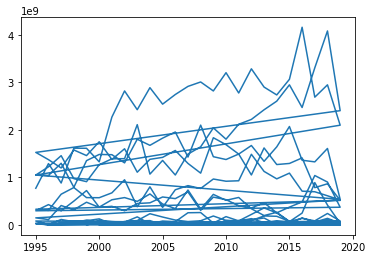

In [46]:
plt.plot(list_years, list_gross, label='Sample Data')
plt.show()